<h1><center>Car Price Prediction</center></h1>

In [1]:
import pandas as pd
import numpy as np

## Data Preparation

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data

--2025-09-28 20:47:31--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.01s   

2025-09-28 20:47:31 (140 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [4]:
# Use the raw CSV file link from GitHub
df = pd.read_csv('data.csv')

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [9]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [10]:
df.dtypes == 'object'

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [11]:
df.dtypes [df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [12]:
df.dtypes [df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [14]:
strings = list(df.dtypes [df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [15]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [16]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Data Analysis

In [17]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [19]:
for col in df.columns:
    print(col)
    print(df[col].head())
    print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [20]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston_martin' 'land_rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']

model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240' '2' '3_series_gran_turismo' '3_series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4_series_gran_coupe' '4_series' '400-class' '420-class' '456m'
 '458_italia' '4c' '4runner' '5_series_gran_turismo' '5_series'
 '500-class' '500e' '500' '500l' '500x' '550' '560-class' '570s' '575m'
 '57' '599' '5' '6_series_gran_coupe' '6_series' '600-class' '6000'
 '612_scaglietti' '6

In [23]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

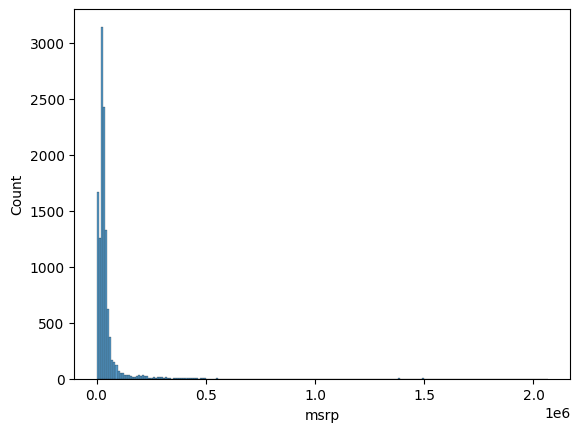

In [25]:
sns.histplot(df.msrp)